In [1]:
#Packages
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib
import matplotlib.pyplot as plt

In [2]:
sauceDF = pd.read_csv('sauce_dataframe.csv')

In [3]:
sauceDF

,Hot Sauce,Ingredients,SHU,Taste,Aroma,Looks,Heat,Label,Capsaicin?,Habanero?,...,Cayenne?,Poblano?,Serrano?,Vinegar?,Water?,Oil?,Fruit?,Vegetable?,Sweetener?,Thickener?
0,Blair's - 16 Million Reserve,Pure Crystal 16 Million Capsaicin,16000000,0.0,0.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Blair's - 3 A.M. Reserve,"Natural Pepper Extract, Red Savina Habanero, C...",2000000,3.5,3.5,4.0,0.1,4.3,0,1,...,1,0,0,1,0,0,0,0,0,0
2,Klowns On Fire! - Mango Reaper,"Mangos, Key Lime, Lemon Juice, Jalapeno Juice,...",1569300,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,1,1,0
3,Blair's - Ultra Death Sauce,"Habanero Peppers, Salt, Cayenne Peppers, Natur...",1100000,2.8,3.7,3.9,2.5,5.0,0,1,...,1,0,1,1,0,0,0,0,0,0
4,Ass in the Tub - Ghost Pepper Sauce,"Bhut Jolokia (Ghost) Peppers, Carrots, Papayas...",1000000,4.9,4.9,4.0,4.9,5.0,0,0,...,0,0,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,Goldson's - MoreFire! Pepper Sauce,"Aged Red Peppers, Distilled Vinegar, Salt, Xan...",0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,1
573,TryMe - Cajun Sunshine Sauce,"Red Cayenne Peppers, Distilled Vinegar, Water,...",0,0.0,0.0,0.0,0.0,0.0,0,0,...,1,0,0,1,1,0,0,0,0,1
574,Melbourne Hot Sauce - Habanero Roja,"Habanero, Ginger, Lemon Juice, Vinegar, Salt, ...",0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,1,0,0,0,0,1,0
575,TryMe - Tiger Sauce,"Red Cayenne Peppers, Distilled Vinegar, Sugar,...",0,3.8,3.5,3.5,1.0,4.5,0,0,...,1,0,0,1,1,0,0,0,1,1


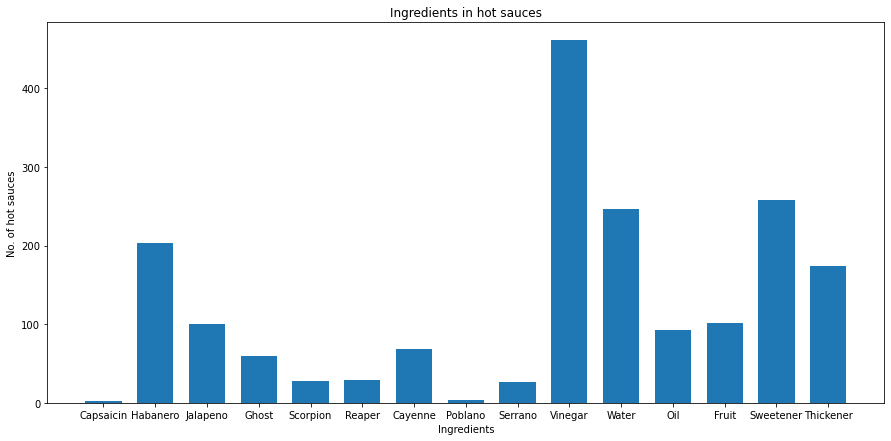

In [4]:
 
a=0
b=0
c=0
d=0
e=0
f=0
g=0
h=0
s=0
j=0
k=0
l=0
m=0
n=0
o=0

#This loop counts how many hot sauces have X ingridient by finding the amount of 1s in each ingridient
for i in range(0,len(sauceDF)):
    if sauceDF['Capsaicin?']      .loc[i]==1:
        a=a+1
    if sauceDF['Habanero?']       .loc[i]==1:
        b=b+1
    if sauceDF['Jalapeno?']       .loc[i]==1:
        c=c+1
    if sauceDF['Ghost?']          .loc[i]==1:
        d=d+1
    if sauceDF['Scorpion?']       .loc[i]==1:
        e=e+1
    if sauceDF['Carolina Reaper?'].loc[i]==1:
        f=f+1
    if sauceDF['Cayenne?']        .loc[i]==1:
        g=g+1
    if sauceDF['Poblano?']        .loc[i]==1:
        h=h+1
    if sauceDF['Serrano?']        .loc[i]==1:
        s=s+1
    if sauceDF['Vinegar?']        .loc[i]==1:
        j=j+1
    if sauceDF['Water?']          .loc[i]==1:
        k=k+1
    if sauceDF['Oil?']          .loc[i]==1:
        l=l+1
    if sauceDF['Fruit?']          .loc[i]==1:
        m=m+1
    if sauceDF['Sweetener?']      .loc[i]==1:
        n=n+1
    if sauceDF['Thickener?']      .loc[i]==1:
        o=o+1

#putting the data in a dictionary so that the name if the ingridients are displayed in the bar graph.
data={'Capsaicin':a,'Habanero':b,'Jalapeno':c,'Ghost':d,'Scorpion':e,'Reaper':f,'Cayenne':g,
'Poblano':h,'Serrano':s,'Vinegar':j,'Water':k,'Oil':l,'Fruit':m,'Sweetener':n,'Thickener':o}
ingridients=list(data.keys())
values=list(data.values())
fig = plt.figure(figsize = (15, 7))
 
# creating the bar graph
plt.bar(ingridients, values, width = 0.7)
 
plt.xlabel("Ingredients")
plt.ylabel("No. of hot sauces")
plt.title("Ingredients in hot sauces")
plt.show()



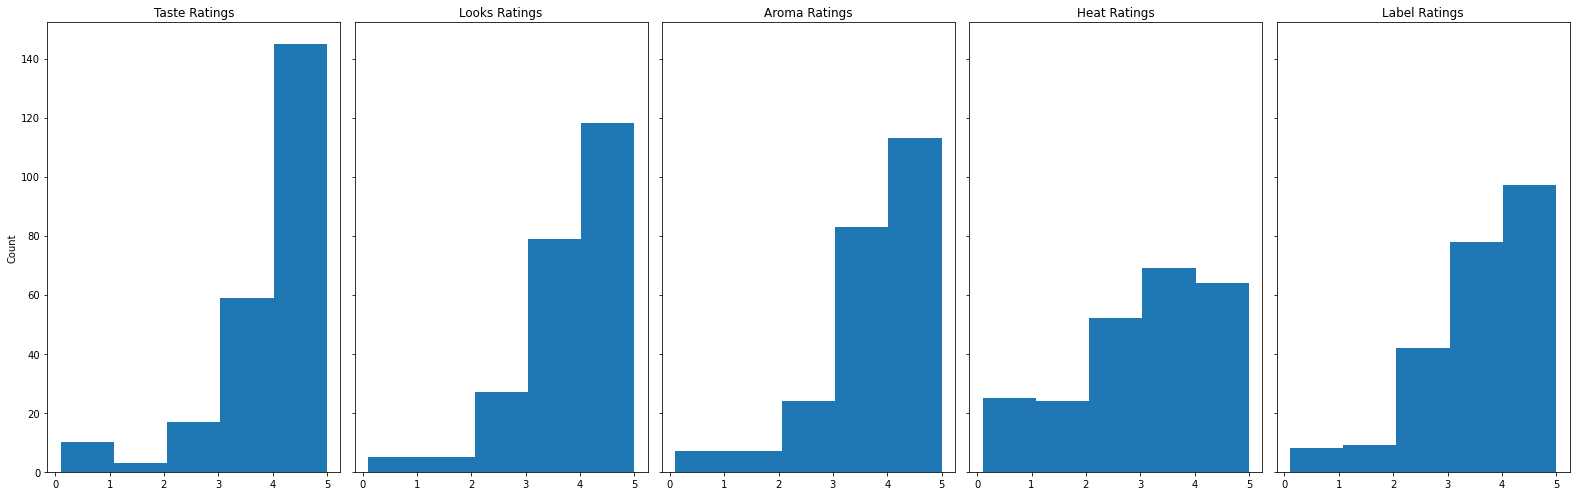

In [5]:
#This removes the 0 values from the ratings, reducing the noise of the data.
Taste=sauceDF['Taste']
Taste=Taste[Taste!=0]
Looks=sauceDF['Looks']
Looks=Looks[Looks!=0]
Aroma=sauceDF['Aroma']
Aroma=Aroma[Aroma!=0]
Heat=sauceDF['Heat']
Heat=Heat[Heat!=0]
Label=sauceDF['Label']
Label=Label[Label!=0]

#setting up the plots next to each other (so they share the same y-axis)
fig, axs = plt.subplots(1, 5, sharey=True,figsize = (22,7),tight_layout=True)

# this sets the histograms as well as the titles for each subplot
# "bins" sets the number of bins
axs[0].hist(Taste, bins=5)
axs[1].hist(Looks, bins=5)
axs[2].hist(Aroma, bins=5)
axs[3].hist(Heat, bins=5)
axs[4].hist(Label, bins=5)
axs[0].title.set_text('Taste Ratings')
axs[0].set_ylabel('Count')
axs[1].title.set_text('Looks Ratings')
axs[2].title.set_text('Aroma Ratings')
axs[3].title.set_text('Heat Ratings')
axs[4].title.set_text('Label Ratings')

In [6]:
cond_1_DF = sauceDF.loc[(sauceDF['SHU'] > 0) & 
                        (sauceDF['Taste'] + sauceDF['Aroma'] + sauceDF['Looks'] + sauceDF['Heat'] + sauceDF['Label'] > 0)]
cond_2_DF = sauceDF.loc[(sauceDF['SHU'] > 0) & 
                        (sauceDF['Taste'] + sauceDF['Aroma'] + sauceDF['Looks'] + sauceDF['Heat'] + sauceDF['Label'] == 0)]
cond_3_DF = sauceDF.loc[(sauceDF['SHU'] == 0) & 
                        (sauceDF['Taste'] + sauceDF['Aroma'] + sauceDF['Looks'] + sauceDF['Heat'] + sauceDF['Label'] > 0)]

print(len(cond_1_DF['SHU']))
print(len(cond_2_DF['SHU']))
print(len(cond_3_DF['SHU']))

40
22
194


# Condition A: SHU Regression

In [7]:
# Condition A: SHU

cond_A_DF = pd.concat([cond_1_DF,cond_2_DF])

cond_A_DF['log SHU'] = np.log(cond_A_DF['SHU'])
cond_A_DF = cond_A_DF.drop(columns=['Taste','Aroma','Looks','Heat','Label','SHU','Hot Sauce','Ingredients'])
cond_A_DF

,Capsaicin?,Habanero?,Jalapeno?,Ghost?,Scorpion?,Carolina Reaper?,Cayenne?,Poblano?,Serrano?,Vinegar?,Water?,Oil?,Fruit?,Vegetable?,Sweetener?,Thickener?,log SHU
1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,14.508658
3,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,13.910821
4,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,13.815511
5,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,13.815511
7,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,13.592367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,8.006368
47,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,8.006368
52,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,7.649693
59,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,6.616065


Training mean squared error: 6.06 SHU^2
Test mean squared error: 4.97 SHU^2
Training root mean squared error: 2.46 SHU
Test root mean squared error: 2.23 SHU


Capsaicin? 1.4928568458958351
Habanero? 0.35601940273409116
Jalapeno? -1.1805449609531793
Ghost? 0.6236778140807163
Scorpion? 1.4753024850071477
Carolina Reaper? 1.5349149966268927
Cayenne? -0.0
Poblano? 0.0
Serrano? 0.0
Vinegar? 0.0
Water? -0.5815077729954214
Oil? 0.0
Fruit? 0.0
Vegetable? -0.0
Sweetener? -0.0
Thickener? -0.14427147845263083


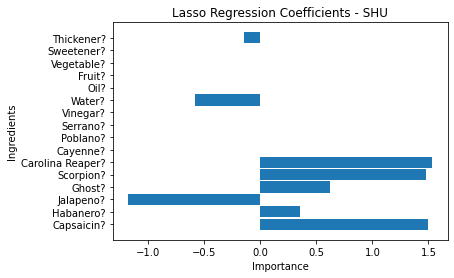

In [8]:

cond_B_DF = cond_3_DF

cond_B_DF = cond_B_DF.drop(columns=['SHU','Hot Sauce','Ingredients'])
cond_B_DF

FeaturesList = cond_B_DF.drop(columns=['Taste','Aroma','Looks','Heat','Label'])

X_train, X_test, y_train, y_test = train_test_split(cond_A_DF.drop(columns=['log SHU']), cond_A_DF['log SHU'], test_size=0.20, random_state=0)
regr_SHU = Lasso(alpha=0.1)
regr_SHU.fit(X_train,y_train)

pred_train = regr_SHU.predict(X_train) # X is the argument for regr.predict()
pred_test = regr_SHU.predict(X_test)

# The mean squared error
print('Training mean squared error: %.2f SHU^2'
      % mean_squared_error(y_train,pred_train))
print('Test mean squared error: %.2f SHU^2'
      % mean_squared_error(y_test,pred_test))

# The root mean squared error
print('Training root mean squared error: %.2f SHU'
      % mean_squared_error(y_train,pred_train,squared=False))
print('Test root mean squared error: %.2f SHU'
      % mean_squared_error(y_test,pred_test,squared=False))

print('\n')
for i in range(0, len(regr_SHU.coef_)):
    print(cond_A_DF.columns[i], regr_SHU.coef_[i])

plt.barh(FeaturesList.columns, regr_SHU.coef_, height = .9)
plt.xlabel("Importance")
plt.ylabel("Ingredients")
plt.title("Lasso Regression Coefficients - SHU")
plt.show()

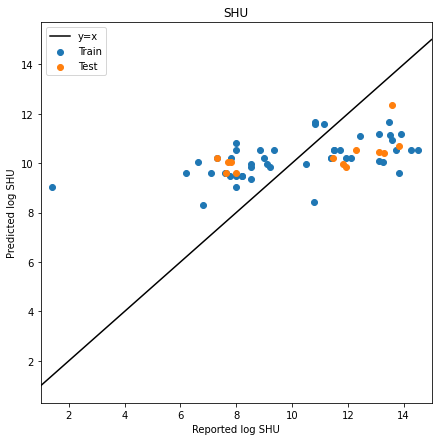

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.scatter(y_train,pred_train,label='Train')
ax.scatter(y_test,pred_test,label='Test')
ax.plot(np.linspace(1,15,15),np.linspace(1,15,15),'k-',label='y=x')
ax.set_xlabel('Reported log SHU')
ax.set_ylabel('Predicted log SHU')

ax.set_title('SHU')
#ax.xaxis.set_ticks(np.arange(1,16,1))
plt.xlim([1,15])
ax.legend()
plt.show()

# Condition B: Taste Labels Regression

In [10]:
# Condition B: Taste Labels

cond_B_DF = cond_3_DF

cond_B_DF = cond_B_DF.drop(columns=['SHU','Hot Sauce','Ingredients'])
cond_B_DF

,Taste,Aroma,Looks,Heat,Label,Capsaicin?,Habanero?,Jalapeno?,Ghost?,Scorpion?,...,Cayenne?,Poblano?,Serrano?,Vinegar?,Water?,Oil?,Fruit?,Vegetable?,Sweetener?,Thickener?
64,5.0,5.0,5.0,4.0,5.0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
65,4.9,4.4,3.3,4.0,3.9,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
67,4.5,4.0,3.0,3.2,4.8,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
70,4.4,4.0,4.0,4.2,4.2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,4.5,4.1,4.0,2.0,4.1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,4.9,4.9,4.5,4.9,4.5,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,1
564,2.5,2.7,2.7,2.8,2.8,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
566,4.1,4.1,4.3,4.8,4.4,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
571,4.5,4.0,3.8,3.5,2.0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [11]:
FeaturesList = cond_B_DF.drop(columns=['Taste','Aroma','Looks','Heat','Label'])

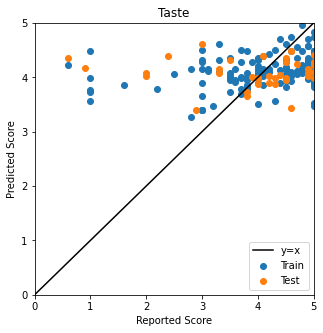

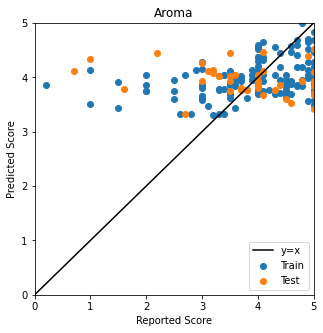

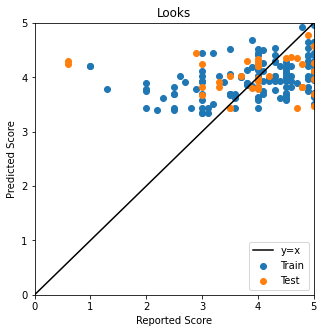

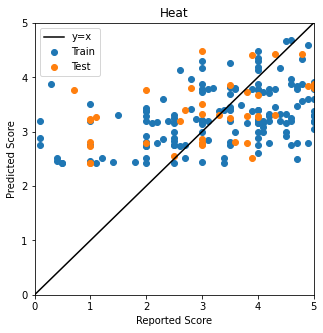

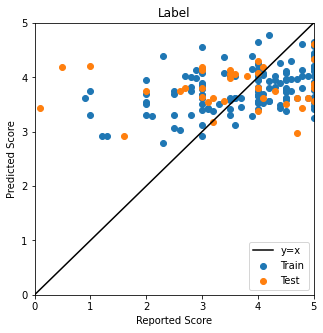

In [12]:
coefs_list = []
labels = ['Taste','Aroma','Looks','Heat','Label']

for label in labels:
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    X_train, X_test, y_train, y_test = train_test_split(FeaturesList, cond_B_DF[label], test_size=0.20, random_state=0)
    regr = Lasso(alpha=0.001)
    regr.fit(X_train,y_train)

    pred_train = regr.predict(X_train)
    pred_test = regr.predict(X_test)

    coefs = np.array(regr.coef_)
    coefs_list.append(coefs)

    ax.scatter(y_train,pred_train,label='Train')
    ax.scatter(y_test,pred_test,label='Test')
    ax.plot(np.linspace(0,5,6),np.linspace(0,5,6),'k-',label='y=x')
    ax.set_xlabel('Reported Score')
    ax.set_ylabel('Predicted Score')
    ax.set_title(label)
    plt.xlim([0,5])
    plt.ylim([0,5])
    ax.legend()

In [13]:
coefs_df = pd.DataFrame(coefs_list, index = labels)
coefs_df.columns = FeaturesList.columns

In [14]:
coefs_df

,Capsaicin?,Habanero?,Jalapeno?,Ghost?,Scorpion?,Carolina Reaper?,Cayenne?,Poblano?,Serrano?,Vinegar?,Water?,Oil?,Fruit?,Vegetable?,Sweetener?,Thickener?
Taste,0.0,0.200095,0.129637,0.201117,0.442301,0.234821,0.073110,0.0,-0.135848,0.264566,-0.044716,0.221790,-0.123137,0.124307,-0.165707,-0.292921
Aroma,0.0,0.084248,0.000000,0.556078,-0.060679,0.336941,0.143719,0.0,-0.417551,0.277539,-0.092235,0.511366,-0.025492,0.007690,-0.102200,-0.242488
Looks,0.0,0.269978,0.234116,0.490781,-0.050688,0.282047,0.000000,0.0,-0.039462,0.009385,-0.042546,0.475921,0.078001,-0.086749,-0.199451,-0.346546
Heat,0.0,0.577814,0.014291,0.976340,-0.000000,1.148912,-0.000000,0.0,0.028554,-0.098852,-0.045166,0.390471,0.088884,0.006240,-0.406473,-0.327223
Label,0.0,0.174798,0.056596,0.372085,0.029566,0.241800,0.142583,0.0,-0.324493,0.453163,-0.060786,0.489382,0.100774,-0.123593,-0.207722,-0.375841


In [15]:
print(coefs_df.loc['Taste'])
#print(FeaturesList.index)

Capsaicin?          0.000000
Habanero?           0.200095
Jalapeno?           0.129637
Ghost?              0.201117
Scorpion?           0.442301
Carolina Reaper?    0.234821
Cayenne?            0.073110
Poblano?            0.000000
Serrano?           -0.135848
Vinegar?            0.264566
Water?             -0.044716
Oil?                0.221790
Fruit?             -0.123137
Vegetable?          0.124307
Sweetener?         -0.165707
Thickener?         -0.292921
Name: Taste, dtype: float64


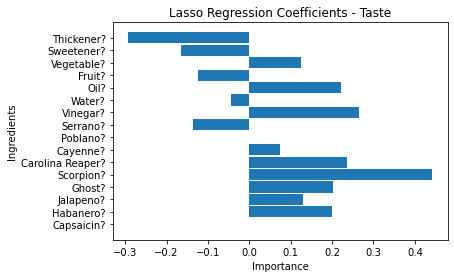

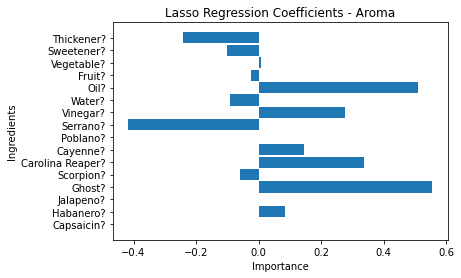

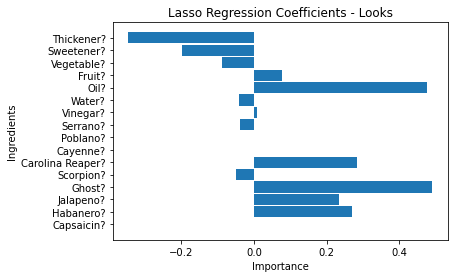

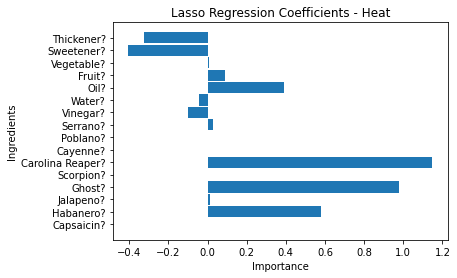

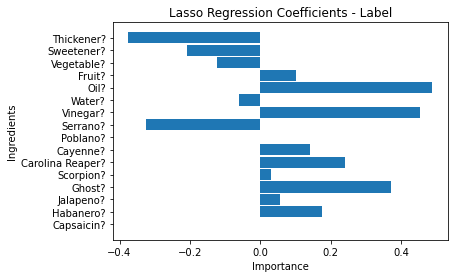

In [17]:
plt.barh(FeaturesList.columns, coefs_df.loc['Taste'], height = .9)
plt.xlabel("Importance")
plt.ylabel("Ingredients")
plt.title("Lasso Regression Coefficients - Taste")
plt.show()

plt.barh(FeaturesList.columns, coefs_df.loc['Aroma'], height = .9)
plt.xlabel("Importance")
plt.ylabel("Ingredients")
plt.title("Lasso Regression Coefficients - Aroma")
plt.show()

plt.barh(FeaturesList.columns, coefs_df.loc['Looks'], height = .9)
plt.xlabel("Importance")
plt.ylabel("Ingredients")
plt.title("Lasso Regression Coefficients - Looks")
plt.show()

plt.barh(FeaturesList.columns, coefs_df.loc['Heat'], height = .9)
plt.xlabel("Importance")
plt.ylabel("Ingredients")
plt.title("Lasso Regression Coefficients - Heat")
plt.show()

plt.barh(FeaturesList.columns, coefs_df.loc['Label'], height = .9)
plt.xlabel("Importance")
plt.ylabel("Ingredients")
plt.title("Lasso Regression Coefficients - Label")
plt.show()
